# IMPORTS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from tensorflow.keras.datasets import mnist

# DATA PREP

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train.reshape(x_train.shape[0], 28, 28, 1), x_test.reshape(x_test.shape[0], 28, 28, 1)

x_val = x_test[0: len(x_test) // 2]
y_val = y_test[0: len(y_test) // 2]

x_test = x_test[len(x_test) // 2: ]
y_test = y_test[len(y_test) // 2: ]

In [4]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(60000, 28, 28, 1)
(5000, 28, 28, 1)
(5000, 28, 28, 1)


In [5]:
x_train, x_test, x_val = x_train/255.0, x_test/255.0, x_val/255.0

# DATA VISUALIZATION

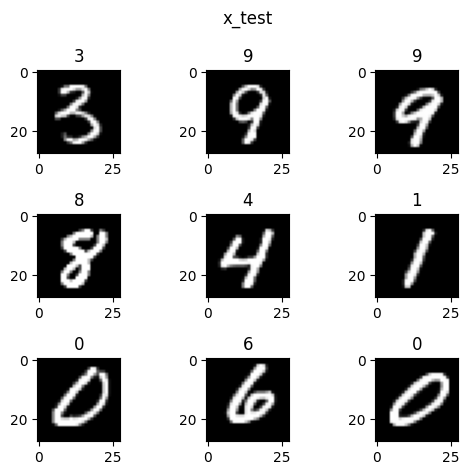

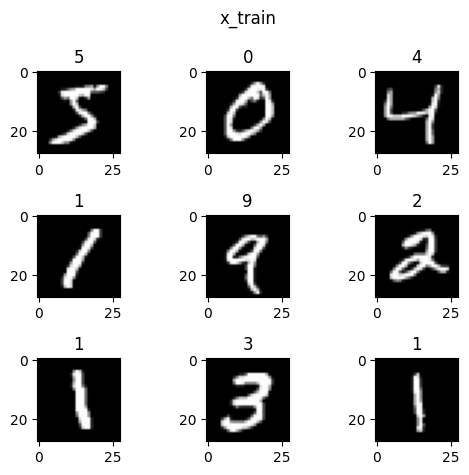

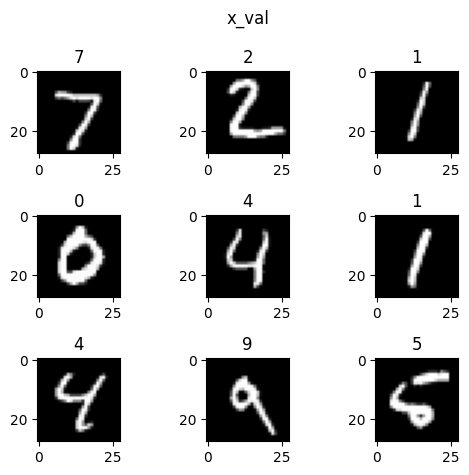

In [17]:
def showNums(Xarray, Yarray, arrayName = '', is_preds = False):
    plt.suptitle(arrayName)
    for i in range(9):
        plt.subplot(330 + 1 + i)
        plt.imshow(Xarray[i], cmap='grey')
        if not is_preds:
            plt.title(Yarray[i])
        else:
            plt.title(int(Yarray[i][0]))
        plt.tight_layout()

    plt.show()
        

showNums(x_test, y_test, arrayName='x_test')
showNums(x_train, y_train, arrayName='x_train')
showNums(x_val, y_val, arrayName='x_val')

# CREATING THE MODEL

In [7]:
model = Sequential([

    layers.Conv2D(64, 3, input_shape=(28, 28, 1), activation='relu'),
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(16, 3, activation='relu'),

    layers.MaxPooling2D(2,2),
    

    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),

    layers.Dense(10, activation='softmax')
])

c:\Users\arado\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1936)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       247,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,330 (1.08 MB)

 Trainable params: 282,330 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

# COMPILE THE MODEL

In [9]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# TRAIN THE MODEL

In [11]:
Model_History = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val), validation_batch_size=128, callbacks=[early_stopping])

AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.8494 - loss: 0.5000 - val_accuracy: 0.9750 - val_loss: 0.0799
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9839 - loss: 0.0537 - val_accuracy: 0.9732 - val_loss: 0.0796
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9889 - loss: 0.0348 - val_accuracy: 0.9802 - val_loss: 0.0579
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9932 - loss: 0.0226 - val_accuracy: 0.9820 - val_loss: 0.0620
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9937 - loss: 0.0186 - val_accuracy: 0.9842 - val_loss: 0.0566
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9955 - loss: 0.0140 - val_accuracy: 0.9812 - val_loss: 0.0590
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9963 - loss: 0.0122 - val_accuracy: 0.9844 - val_loss: 0.0552
Epoch 8/10
469/469 ━━━━━

# EVAULUATE THE MODEL

In [12]:
accuracy, loss = model.evaluate(x_test, y_test)

print(Model_History.history)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9956 - loss: 0.0175
{'accuracy': [0.9358166456222534, 0.984000027179718, 0.9889333248138428, 0.9918833374977112, 0.9935333132743835, 0.9947666525840759, 0.9958000183105469, 0.9963333606719971, 0.996399998664856, 0.9964166879653931], 'loss': [0.21735478937625885, 0.05260338634252548, 0.03553605079650879, 0.02595296874642372, 0.01980414427816868, 0.016110233962535858, 0.013320999220013618, 0.0110898083075881, 0.01129550114274025, 0.010593929328024387], 'val_accuracy': [0.9750000238418579, 0.9732000231742859, 0.9801999926567078, 0.9819999933242798, 0.9842000007629395, 0.9811999797821045, 0.9843999743461609, 0.984000027179718, 0.9860000014305115, 0.98580002784729], 'val_loss': [0.07991834729909897, 0.07960626482963562, 0.05789872258901596, 0.06199263408780098, 0.05663483217358589, 0.05899733304977417, 0.05518004298210144, 0.05674790218472481, 0.054519880563020706, 0.06364574283361435]}


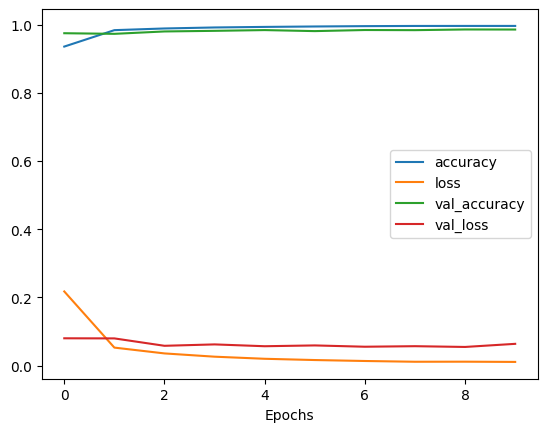

In [13]:
plt.plot(Model_History.history['accuracy'], label='accuracy')
plt.plot(Model_History.history['loss'], label='loss')
plt.plot(Model_History.history['val_accuracy'], label='val_accuracy')
plt.plot(Model_History.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')

plt.legend()
plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


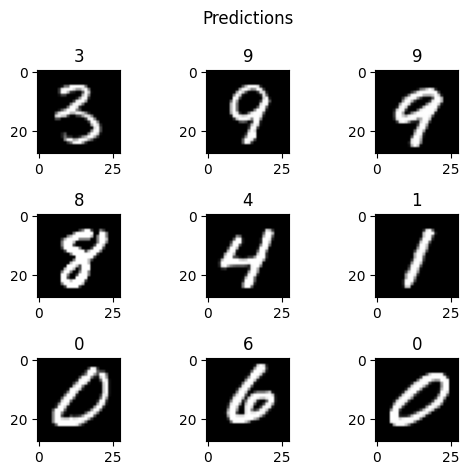

In [18]:
y_pred = model.predict(x_test)

for num in range(len(y_pred)):
    y_pred[num] = y_pred[num].argmax()



showNums(x_test, y_pred, arrayName='Predictions', is_preds = True)